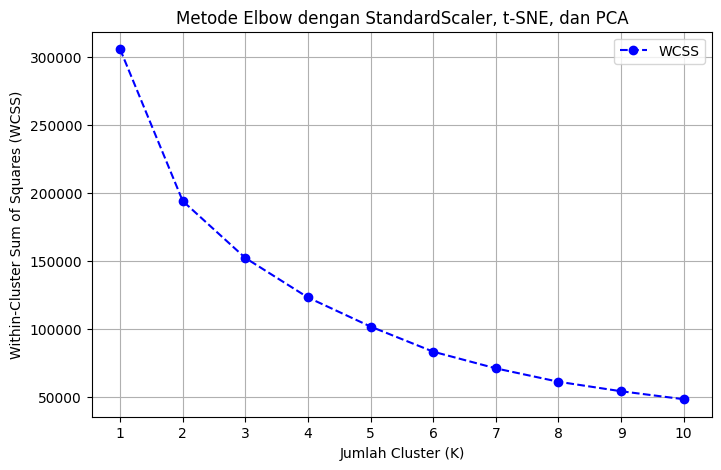

K=2, Silhouette Score=0.3252, Davies-Bouldin Index=1.2574
K=3, Silhouette Score=0.3152, Davies-Bouldin Index=1.2223
K=4, Silhouette Score=0.3059, Davies-Bouldin Index=1.2028
K=5, Silhouette Score=0.3259, Davies-Bouldin Index=1.0777
K=6, Silhouette Score=0.3501, Davies-Bouldin Index=0.9285
K=7, Silhouette Score=0.3582, Davies-Bouldin Index=0.9148
K=8, Silhouette Score=0.3603, Davies-Bouldin Index=0.8736
K=9, Silhouette Score=0.3660, Davies-Bouldin Index=0.8897
K=10, Silhouette Score=0.3691, Davies-Bouldin Index=0.8900


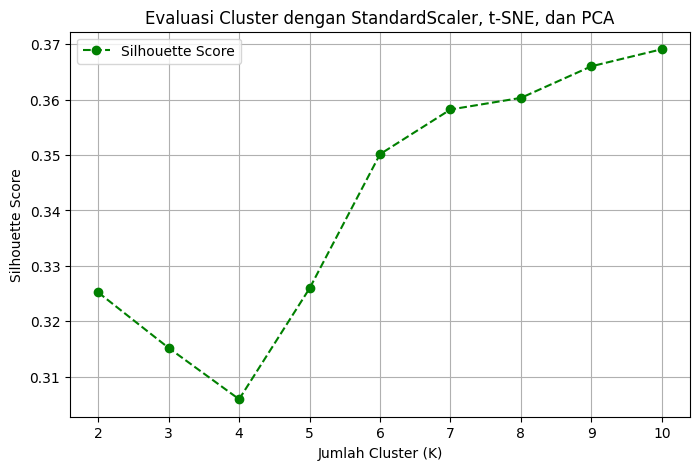

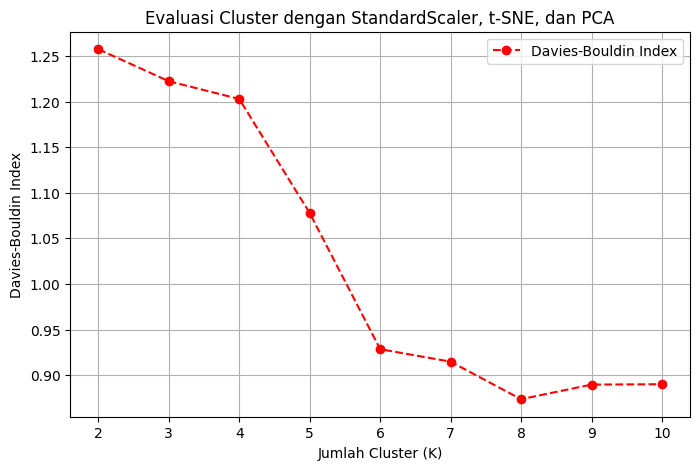

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset
file_path = "https://raw.githubusercontent.com/SoraIroShiro/submission_basic_ML/refs/heads/main/bank_transactions_data_2.csv"
df = pd.read_csv(file_path)

# Menentukan kolom numerik
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

# Normalisasi data dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])

# Menggunakan t-SNE sebelum PCA untuk menangkap hubungan non-linear
X_tsne = TSNE(n_components=3, random_state=42).fit_transform(X_scaled)

# Mengurangi dimensi dengan PCA (menyimpan 95% varians)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_tsne)

# Menghitung Within-Cluster Sum of Squares (WCSS) untuk berbagai jumlah cluster
wcss_scores = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss_scores.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_scores, marker='o', linestyle='--', color='b', label="WCSS")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Metode Elbow dengan StandardScaler, t-SNE, dan PCA")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi menggunakan Silhouette Score dan Davies-Bouldin Index
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, cluster_labels)
    db_score = davies_bouldin_score(X_pca, cluster_labels)
    silhouette_scores.append(sil_score)
    davies_bouldin_scores.append(db_score)
    print(f'K={k}, Silhouette Score={sil_score:.4f}, Davies-Bouldin Index={db_score:.4f}')

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g', label="Silhouette Score")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Evaluasi Cluster dengan StandardScaler, t-SNE, dan PCA")
plt.xticks(K_range)
plt.legend()
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Index
plt.figure(figsize=(8, 5))
plt.plot(K_range, davies_bouldin_scores, marker='o', linestyle='--', color='r', label="Davies-Bouldin Index")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Evaluasi Cluster dengan StandardScaler, t-SNE, dan PCA")
plt.xticks(K_range)
plt.legend()
plt.grid(True)
plt.show()
